In [1]:
import pandas as pd 
import numpy as np

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256)))

bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

# Dataset Spain
After the 18th of May the Spanish government stopped publishing data about recovered

In [108]:
# data until 17 may
url = "https://raw.githubusercontent.com/mariocastro73/predictability/master/datasets/covid-19-es.csv"
# data until 31 march
url_confirmed = "https://raw.githubusercontent.com/mariocastro73/predictability/master/datasets/confirmed-march31.csv"
url_recovered = "https://raw.githubusercontent.com/mariocastro73/predictability/master/datasets/recovered-march31.csv"
url_death = "https://raw.githubusercontent.com/mariocastro73/predictability/master/datasets/deaths-march31.csv"

df = pd.read_csv(url, keep_date_col=True)
df = df[~df.isna().any(axis=1)].reset_index(drop=True)
df['Day'] = pd.date_range(start="2020.01.31", end="2020.05.17")
df['Day'] = pd.to_datetime(df.Day, format='%Y-%m-%d').dt.strftime('%Y.%m.%d')

df.loc[(df.Day <= "2020.03.31") & (df.Day >= "2020.02.27"), ['Death', 'Confirmed', 'Recovered']] = np.column_stack([pd.read_csv(url_death)['Spain'],
                                                                        pd.read_csv(url_confirmed)['Spain'],
                                                                        pd.read_csv(url_recovered)['Spain']])
df['Active_cases'] = df.Confirmed - df.Recovered - df.Death
df['Active_cases_smooth'] = df.Active_cases.rolling(2, min_periods=1).mean()
df['Recovered_Death'] = (df.Recovered + df.Death).diff().fillna(0) # (daily derivative)
df['Recovered_Death_smooth'] = df.Recovered_Death.rolling(2, min_periods=1).mean()

df = df[df.Day >= '2020.02.28'].reset_index(drop=True)
df.loc[0, 'Recovered_Death_smooth'] = 0.

df

,Day,Death,Confirmed,Recovered,Active_cases,Active_cases_smooth,Recovered_Death,Recovered_Death_smooth
0,2020.02.28,0.0,32.0,0.0,32.0,24.0,0.0,0.0
1,2020.02.29,0.0,44.0,0.0,44.0,38.0,0.0,0.0
2,2020.03.01,0.0,66.0,0.0,66.0,55.0,0.0,0.0
3,2020.03.02,0.0,114.0,0.0,114.0,90.0,0.0,0.0
4,2020.03.03,0.0,150.0,0.0,150.0,132.0,0.0,0.0
...,...,...,...,...,...,...,...,...
75,2020.05.13,27091.0,228691.0,140823.0,60777.0,61570.0,2025.0,2019.0
76,2020.05.14,27308.0,229540.0,143374.0,58858.0,59817.5,2768.0,2396.5
77,2020.05.15,27449.0,230183.0,144783.0,57951.0,58404.5,1550.0,2159.0
78,2020.05.16,27549.0,230698.0,146446.0,56703.0,57327.0,1763.0,1656.5


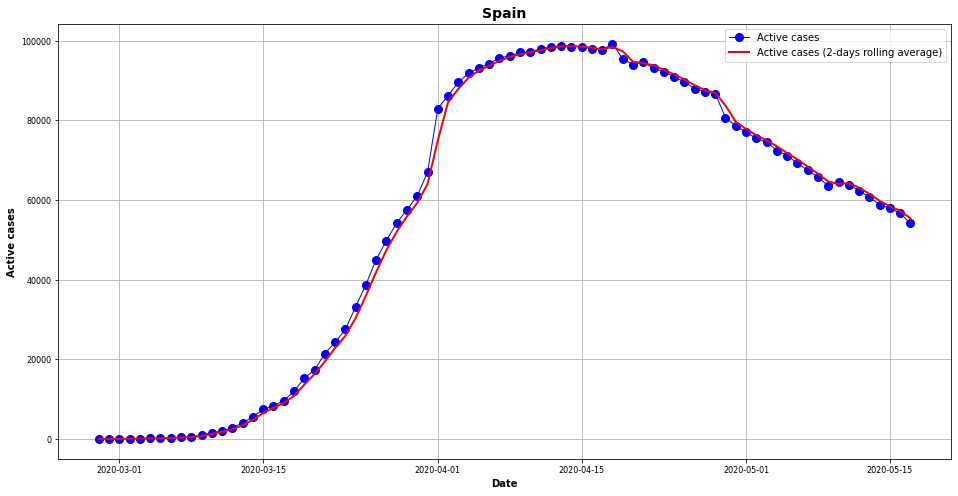

In [5]:
# save fgure with plot from january
plt.plot(pd.to_datetime(df.Day), df.Active_cases, 'bo-', lw=1, label='Active cases')
plt.plot(pd.to_datetime(df.Day), df.Active_cases_smooth, 'r', lw=2, label='Active cases (2-days rolling average)')
#ymin, ymax = plt.ylim()
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.02.28']), 0, ymax, color='r')
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.03.31']), 0, ymax, color='g')
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.04.18']), 0, ymax, color='r')
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.title('Spain', weight='bold', fontsize=14)
plt.legend()
plt.grid()
#plt.savefig("active_cases_data_Spain.png", quality=100, transparent=True, dpi=400)
plt.show()

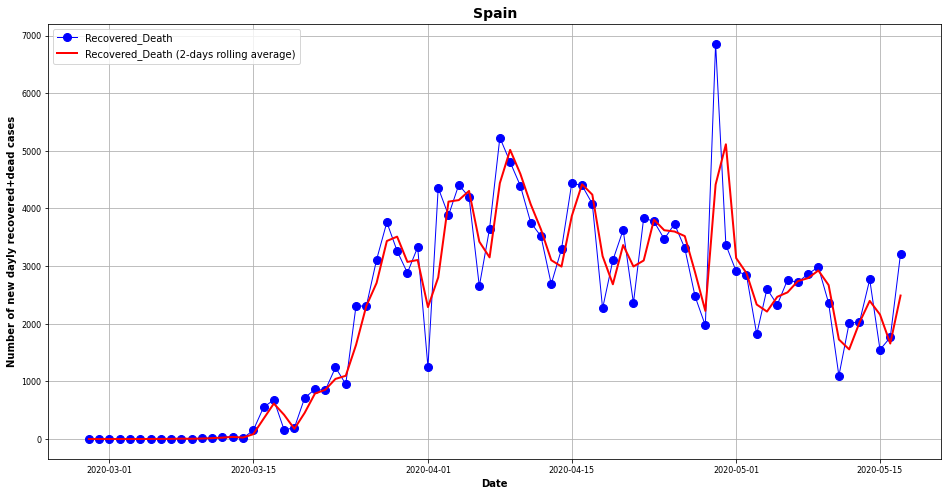

In [6]:
plt.plot(pd.to_datetime(df.Day), df.Recovered_Death, 'bo-', lw=1, label='Recovered_Death')
plt.plot(pd.to_datetime(df.Day), df.Recovered_Death_smooth, 'r', lw=2, label='Recovered_Death (2-days rolling average)')
#ymin, ymax = plt.ylim()
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.02.28']), 0, ymax, color='r')
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.03.31']), 0, ymax, color='g')
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.04.18']), 0, ymax, color='r')
plt.xlabel('Date')
plt.ylabel('Number of new dayly recovered+dead cases')
plt.title('Spain', weight='bold', fontsize=14)
plt.legend()
plt.grid()
plt.show()
#plt.savefig("recovered_death_data_Spain.png", quality=100, transparent=True, dpi=400)

In [7]:
# save spanish dataframe as csv
df.to_csv('../Data/dataset_esp.csv', index=False)

# Dataset Italy
The data is taken from Protezione Civile site, starting from 2020.02.24.

In [8]:
# dataset active cases
# all data from 2020-02-28 to today
url_ita = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento" + \
            "-nazionale/dpc-covid19-ita-andamento-nazionale.csv"

df1 = pd.read_csv(url_ita)[['data', 'totale_casi', 'dimessi_guariti', 'deceduti']]
df1.columns = ['Day', 'Confirmed', 'Recovered', 'Death']
df1['Day'] = pd.to_datetime(df1.Day, format='%Y.%m.%d').dt.strftime('%Y.%m.%d')


df1['Active_cases'] = df1.Confirmed - df1.Recovered - df1.Death
df1['Active_cases_smooth'] = df1.Active_cases.rolling(7, min_periods=1).mean()
df1['Recovered_Death'] = (df1.Recovered + df1.Death).diff().fillna(0) # (daily derivative)
df1['Recovered_Death_smooth'] = df1.Recovered_Death.rolling(7, min_periods=1).mean()


df1

,Day,Confirmed,Recovered,Death,Active_cases,Active_cases_smooth,Recovered_Death,Recovered_Death_smooth
0,2020.02.24,229,1,7,221,221.000000,0.0,0.000000
1,2020.02.25,322,1,10,311,266.000000,3.0,1.500000
2,2020.02.26,400,3,12,385,305.666667,4.0,2.333333
3,2020.02.27,650,45,17,588,376.250000,47.0,13.500000
4,2020.02.28,888,46,21,821,465.200000,5.0,11.800000
...,...,...,...,...,...,...,...,...
500,2021.07.08,4267105,4097905,127731,41469,43919.714286,1762.0,2029.428571
501,2021.07.09,4268491,4099339,127756,41396,43007.857143,1459.0,1898.857143
502,2021.07.10,4269885,4101102,127768,41015,42356.285714,1775.0,1705.000000
503,2021.07.11,4271276,4102420,127775,41081,41844.428571,1325.0,1648.857143


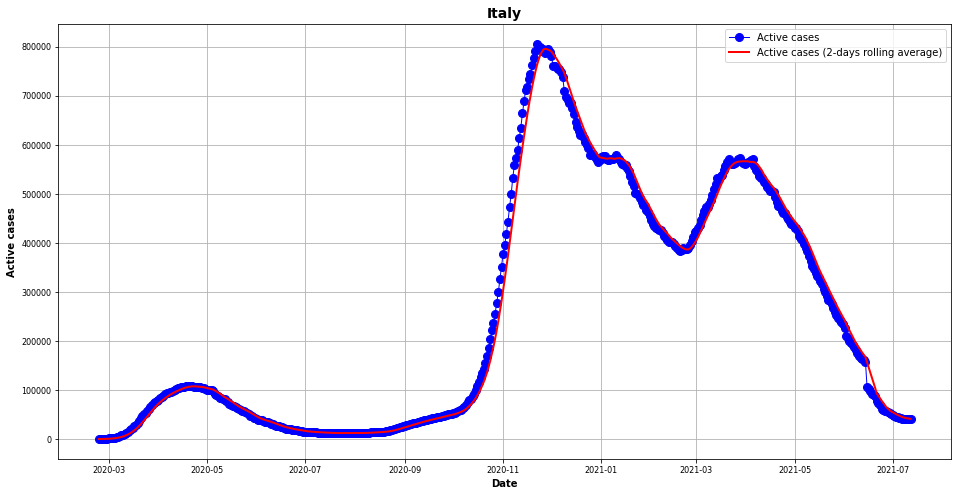

In [10]:
# save fgure with plot from january
plt.plot(pd.to_datetime(df1.Day), df1.Active_cases, 'bo-', lw=1, label='Active cases')
plt.plot(pd.to_datetime(df1.Day), df1.Active_cases_smooth, 'r', lw=2, label='Active cases (2-days rolling average)')
#ymin, ymax = plt.ylim()
#plt.vlines(pd.to_datetime(df1.Day[df1.Day == '2020.02.28']), 0, ymax, color='r')
#plt.vlines(pd.to_datetime(df1.Day[df1.Day == '2020.03.31']), 0, ymax, color='g')
#plt.vlines(pd.to_datetime(df1.Day[df1.Day == '2020.04.18']), 0, ymax, color='r')
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.title('Italy', weight='bold', fontsize=14)
plt.legend()
plt.grid()
#plt.savefig("active_cases_data_Spain.png", quality=100, transparent=True, dpi=400)
plt.show()

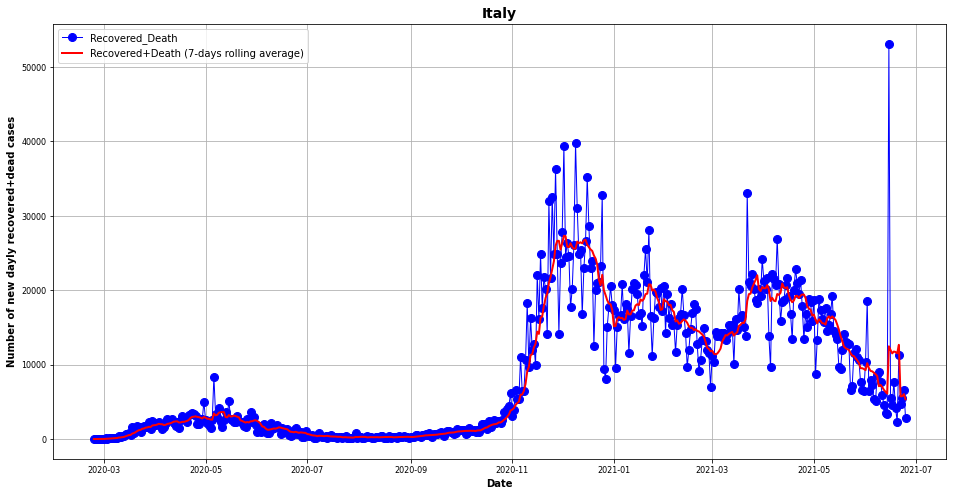

In [9]:
plt.plot(pd.to_datetime(df1.Day), df1.Recovered_Death, 'bo-', lw=1, label='Recovered_Death')
plt.plot(pd.to_datetime(df1.Day), df1.Recovered_Death_smooth, 'r', lw=2, label='Recovered+Death (7-days rolling average)')
plt.xlabel('Date')
plt.ylabel('Number of new dayly recovered+dead cases')
plt.title('Italy', weight='bold', fontsize=14)
plt.legend()
plt.grid()
plt.show()
#plt.savefig("recovered_death_data_Italy.png", quality=100, transparent=True, dpi=400)

In [65]:
# save italian dataframe as csv
df1.to_csv('../Data/dataset_ita.csv', index=False)

NameError: name 'df1' is not defined

In [126]:
def make_dataset(country: str):
    df2 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

    if country == 'France':
        prov = np.nan
    df2 = df2[df2['Country/Region'] == country].iloc[:, 4:].T
    df2['date'] = pd.to_datetime(df2.index, format='%m/%d/%y').strftime('%Y.%m.%d')
    df2.columns = ['Confirmed', 'date']
    df2 = df2[df2.date >= '2020.02.28'].reset_index(drop=True)

    df3 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
    df3 = df3[df3['Country/Region'] == country].iloc[:, 4:].T
    df3['date'] = pd.to_datetime(df3.index, format='%m/%d/%y').strftime('%Y.%m.%d')
    df3.columns = ['recovered', 'date']
    df3 = df3[df3.date >= '2020.02.28'].reset_index(drop=True)

    df4 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df4 = df4[df4['Country/Region'] == country].iloc[:, 4:].T
    df4['date'] = pd.to_datetime(df4.index, format='%m/%d/%y').strftime('%Y.%m.%d')
    df4.columns = ['deaths', 'date']
    df4 = df4[df4.date >= '2020.02.28'].reset_index(drop=True)

    df2['Recovered'] = df3.loc[df3.date >= '2020.02.28', 'recovered']
    df2['Death'] = df4.loc[df4.date >= '2020.02.28', 'deaths']

    df2['Active_cases'] = df2.Confirmed - df2.Recovered - df2.Death
    df2['Active_cases_smooth'] = df2.Active_cases.rolling(7, min_periods=1).mean()
    df2['Recovered_Death'] = (df2.Recovered + df2.Death).diff().fillna(0) # (daily derivative)
    df2['Recovered_Death_smooth'] = df2.Recovered_Death.rolling(7, min_periods=1).mean()

    return df2

make_dataset('Spain')

,Confirmed,date,Recovered,Death,Active_cases,Active_cases_smooth,Recovered_Death,Recovered_Death_smooth
0,32,2020.02.28,2,0,30,3.000000e+01,0.0,0.000000
1,45,2020.02.29,2,0,43,3.650000e+01,0.0,0.000000
2,84,2020.03.01,2,0,82,5.166667e+01,0.0,0.000000
3,120,2020.03.02,2,0,118,6.825000e+01,0.0,0.000000
4,165,2020.03.03,2,1,162,8.700000e+01,1.0,0.200000
...,...,...,...,...,...,...,...,...
497,3937192,2021.07.09,150376,81003,3705813,3.649431e+06,6.0,13.142857
498,3937192,2021.07.10,150376,81003,3705813,3.664178e+06,0.0,13.142857
499,3937192,2021.07.11,150376,81003,3705813,3.678926e+06,0.0,13.142857
500,3971124,2021.07.12,150376,81020,3739728,3.693863e+06,17.0,12.285714


In [144]:
tmp = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

tmp = tmp[(tmp['Country/Region'] == 'France') & (tmp['Province/State'] == np.nan)]#.iloc[:, 4:].T
tmp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21


In [114]:
df3 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df3 = df3[df3['Country/Region'] == 'Spain'].iloc[:, 4:].T
df3['date'] = pd.to_datetime(df3.index, format='%m/%d/%y').strftime('%Y.%m.%d')
df3.columns = ['recovered', 'date']
df3 = df3[df3.date >= '2020.02.28'].reset_index(drop=True)

df3

,recovered,date
0,2,2020.02.28
1,2,2020.02.29
2,2,2020.03.01
3,2,2020.03.02
4,2,2020.03.03
...,...,...
497,150376,2021.07.09
498,150376,2021.07.10
499,150376,2021.07.11
500,150376,2021.07.12


In [117]:
df4 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df4 = df4[df4['Country/Region'] == 'Spain'].iloc[:, 4:].T
df4['date'] = pd.to_datetime(df4.index, format='%m/%d/%y').strftime('%Y.%m.%d')
df4.columns = ['deaths', 'date']
df4 = df4[df4.date >= '2020.02.28'].reset_index(drop=True)

df4

,deaths,date
0,0,2020.02.28
1,0,2020.02.29
2,0,2020.03.01
3,0,2020.03.02
4,1,2020.03.03
...,...,...
497,81003,2021.07.09
498,81003,2021.07.10
499,81003,2021.07.11
500,81020,2021.07.12


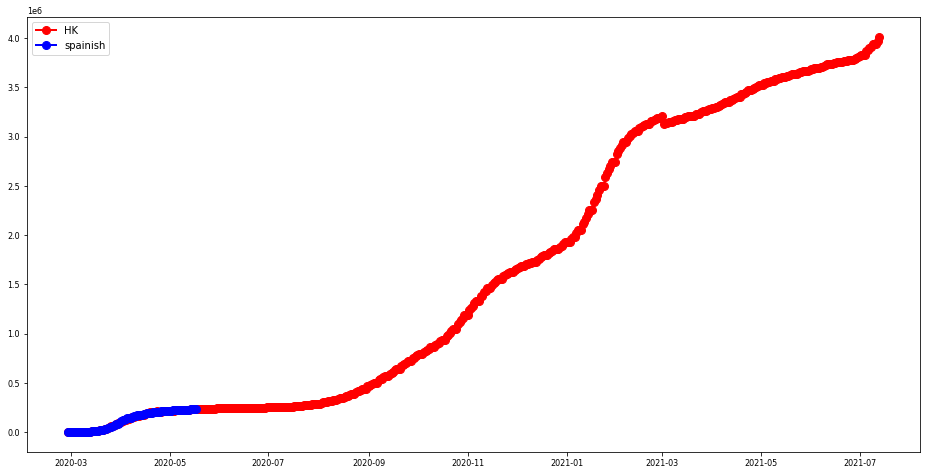

In [93]:
plt.plot(pd.to_datetime(df2[df2.date >= '2020.02.28'].date), df2[df2.date >= '2020.02.28'].Confirmed, 'ro-', label='HK')
plt.plot(pd.to_datetime(df.Day), df.Confirmed, 'bo-', label='spainish')
plt.legend()

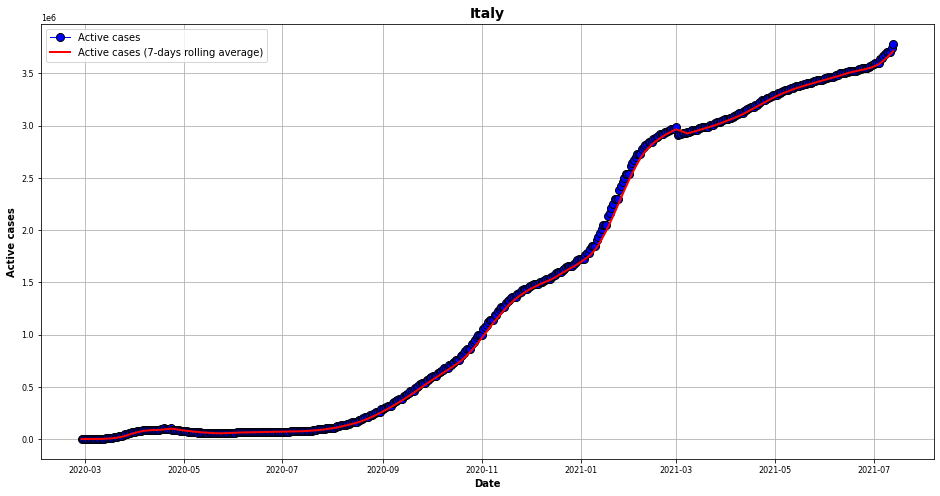

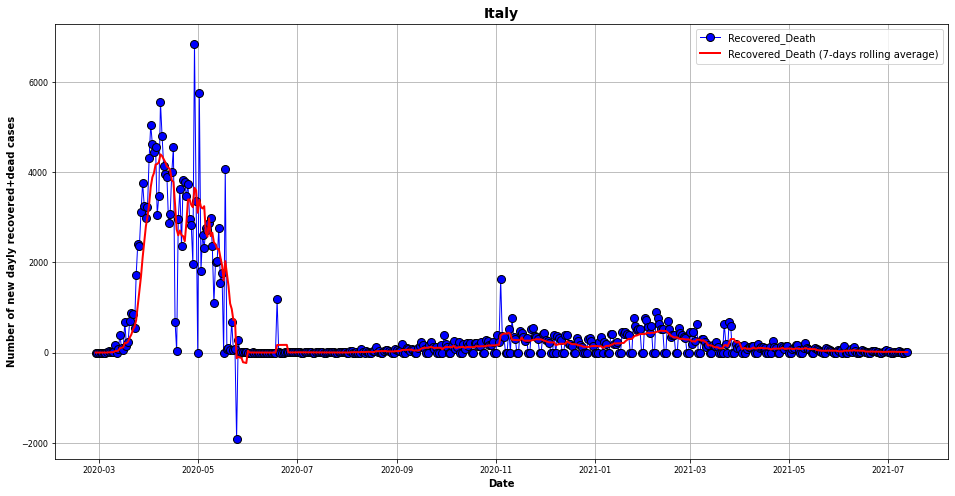

In [134]:
df2 = make_dataset('Spain')

# save figure with plot from january
plt.plot(pd.to_datetime(df2.date), df2.Active_cases, 'bo-', lw=1, mfc='b', mec='k', label='Active cases')
plt.plot(pd.to_datetime(df2.date), df2.Active_cases_smooth, 'r', lw=2, label='Active cases (7-days rolling average)')
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.title('Italy', weight='bold', fontsize=14)
plt.legend()
plt.grid()
#plt.savefig("active_cases_data_Spain.png", quality=100, transparent=True, dpi=400)
plt.show()

plt.plot(pd.to_datetime(df2.date), df2.Recovered_Death, 'bo-', lw=1, mfc='b', mec='k', label='Recovered_Death')
plt.plot(pd.to_datetime(df2.date), df2.Recovered_Death_smooth, 'r', lw=2, label='Recovered_Death (7-days rolling average)')
ymin, ymax = plt.ylim()
plt.xlabel('Date')
plt.ylabel('Number of new dayly recovered+dead cases')
plt.title('Italy', weight='bold', fontsize=14)
plt.legend()
plt.grid()
#plt.xlim(pd.to_datetime(df2[df2.date == '2020.05.01'].date), pd.to_datetime(df2[df2.date == '2021.07.01'].date))
#plt.savefig("recovered_death_data_Spain.png", quality=100, transparent=True, dpi=400)
plt.show()